In [1]:
import pandas as pd
from IPython.display import display

red_wine = pd.read_csv('/content/red-wine.csv')

In [2]:
# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


In [3]:
# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

In [4]:
# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

In [5]:
print(X_train.shape)

(1119, 11)


In [8]:
#model training
#We've chosen a three-layer network with over 1500 neurons. This network should be capable of learning fairly complex relationships in the data.
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=(11,)),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

In [9]:
#optimizer and loss function
model.compile(
    optimizer='adam',
    loss='mae',
)

In [10]:
#Now we're ready to start the training! We've told Keras to feed the optimizer 256 rows of the training data at a time (the batch_size)
#and to do that 10 times all the way through the dataset (the epochs).
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=10,
)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - loss: 0.3590 - val_loss: 0.1376
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1439 - val_loss: 0.1344
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1318 - val_loss: 0.1252
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1208 - val_loss: 0.1240
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1161 - val_loss: 0.1099
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1118 - val_loss: 0.1096
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1046 - val_loss: 0.1026
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1065 - val_loss: 0.1017
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1036 - val_loss: 0.1015
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0982 - val_loss: 0.1000


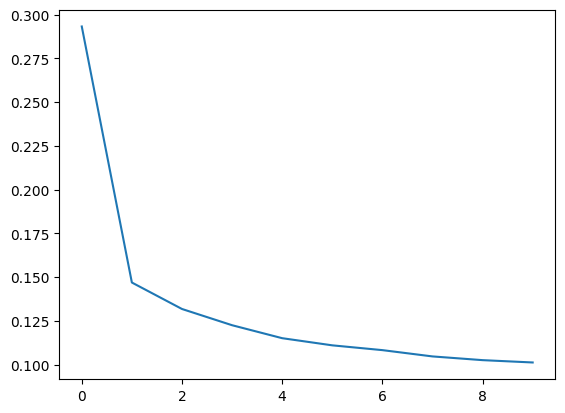

In [11]:
#You can see that Keras will keep you updated on the loss as the model trains.
#Often, a better way to view the loss though is to plot it.
#***The fit method in fact keeps a record of the loss produced during training in a History object.
#We'll convert the data to a Pandas dataframe, which makes the plotting easy.

import pandas as pd
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();


Note: Notice how the loss levels off as the epochs go by. When the loss curve becomes horizontal like that, it means the model has learned all it can and there would be no reason continue for additional epochs.